Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período "diário", com o intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

* o modelo com o storytelling, desde a captura do dado até a entrega do modelo
* justificar a técnica utilizada

*atingir uma acuracidade adequada (acima de 70%)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose



In [60]:
#tendencia - direção
#sazonalidade - recorrencia das oscilações -> entender como funcionam as oscilações da série temporal
#resídio - o que sobra do sinal

df_path = "https://raw.githubusercontent.com/kebaggio/techChallengeFase2/main/base/Dados%20Histo%CC%81ricos%20-%20Ibovespa.csv"

coluna_data=["Data"]

df = pd.read_csv(df_path, sep=',', parse_dates=coluna_data, dayfirst=True, index_col='Data')


In [61]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-01-05,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2024-01-04,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
2024-01-03,132.834,132.697,133.576,132.250,"8,70M","0,10%"
2024-01-02,132.697,134.186,134.195,132.095,"8,44M","-1,11%"
2023-12-28,134.185,134.194,134.389,133.832,"7,81M","-0,01%"


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995 entries, 2024-01-05 to 2020-01-07
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    995 non-null    float64
 1   Abertura  995 non-null    float64
 2   Máxima    995 non-null    float64
 3   Mínima    995 non-null    float64
dtypes: float64(4)
memory usage: 71.2 KB


In [63]:
df.loc['2024-01-02']

Último      132.697
Abertura    134.186
Máxima      134.195
Mínima      132.095
Vol.          8,44M
Var%         -1,11%
Name: 2024-01-02 00:00:00, dtype: object

In [69]:
# Configure a frequência do índice como frequência comercial (B para business days)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y').to_period('B')

/var/folders/v9/bcwxmmds3r58z4zd22tpx4k00000gn/T/ipykernel_13867/3099877172.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df.index = pd.to_datetime(df.index, format='%d/%m/%Y').to_period('B')


In [73]:
df = df.drop(['Vol.', 'Var%'], axis=1)

#df['Vol.'] = df['Vol.'].replace('[^\d.]', '', regex=True).astype(float)
#df['Var%'] = df['Var%'].replace('[^\d.]', '', regex=True).astype(float)



KeyError: "['Vol.', 'Var%'] not found in axis"

In [74]:
# Selecione uma coluna específica para a decomposição, por exemplo, 'Abertura'
serie_temporal = df['Abertura']

# Aplicar decomposição sazonal
resultados = seasonal_decompose(serie_temporal, period=12)  # Substitua 12 pelo período apropriado, se conhecido


<Axes: xlabel='Data'>

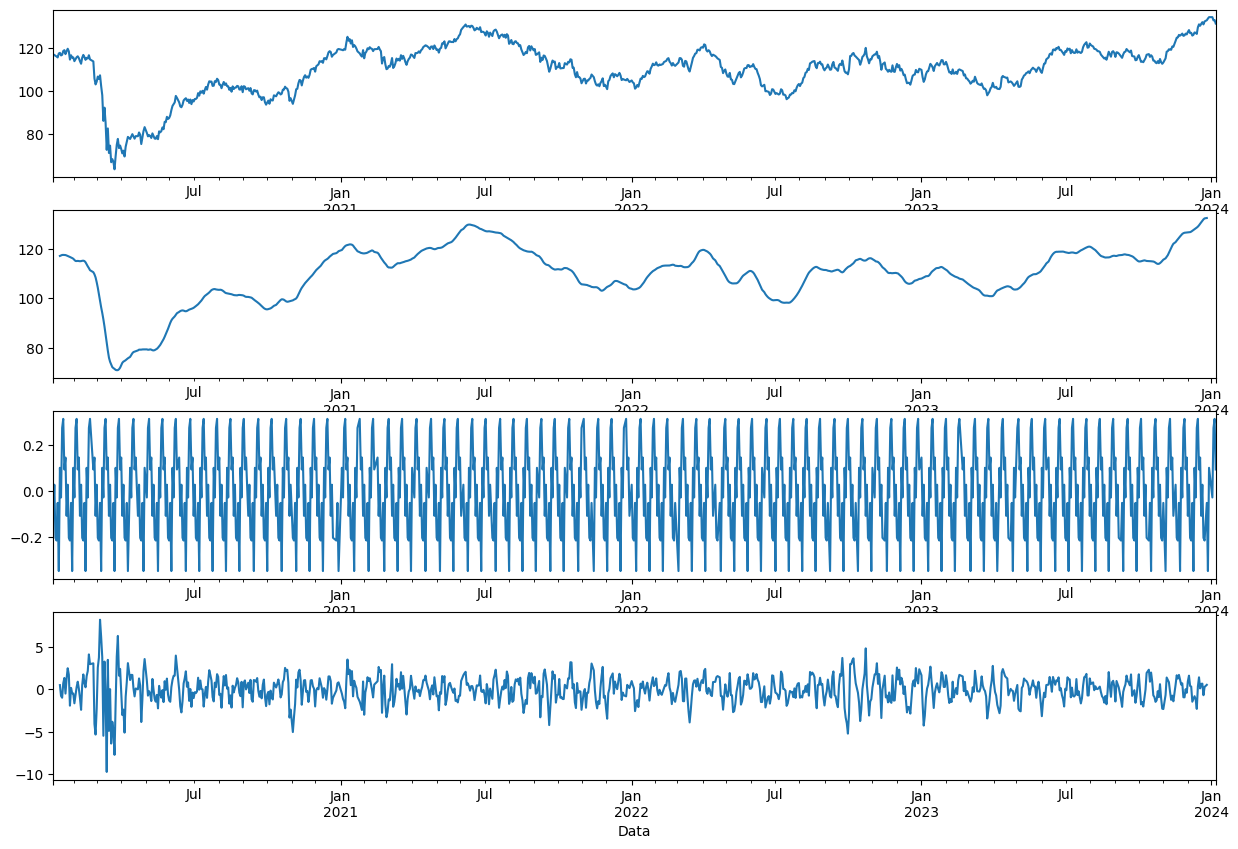

In [76]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

